In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
delhiaqi=pd.read_csv(r"C:\Users\bhanu\Downloads\delhiaqi.csv")

In [10]:
delhiaqi.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [13]:
delhiaqi.shape

(561, 9)

Its shows number of rows and columns

In [15]:
delhiaqi.columns 

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

Its column names

In [16]:
delhiaqi.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

Its shows missing values

Next we want to clean the data 
1.Convert Data Column 

In [21]:
delhiaqi["date"]=pd.to_datetime(delhiaqi["date"])

2.Fill missing values

In [22]:
delhiaqi.fillna(delhiaqi.mean(),inplace=True)

.Analysis

In [23]:
delhiaqi.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094


                           Visualization
                      1.AQI Trend Over Time

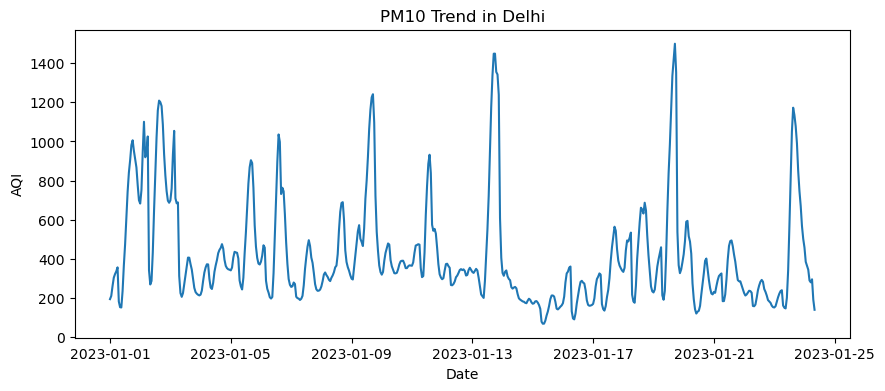

In [27]:
plt.figure(figsize=(10,4))
plt.plot(delhiaqi['date'], delhiaqi['pm10'])
plt.title("PM10 Trend in Delhi")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

                         2.Pollutant Comparison 

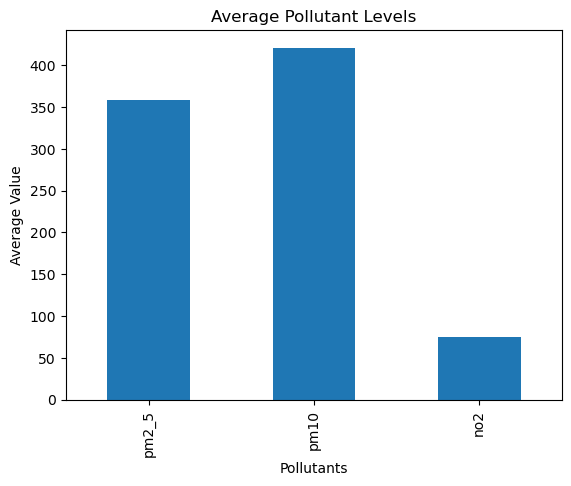

In [29]:
delhiaqi[['pm2_5', 'pm10', 'no2']].mean().plot(kind='bar')
plt.title("Average Pollutant Levels")
plt.xlabel("Pollutants")
plt.ylabel("Average Value")
plt.show()

                               3.Monthly AQI

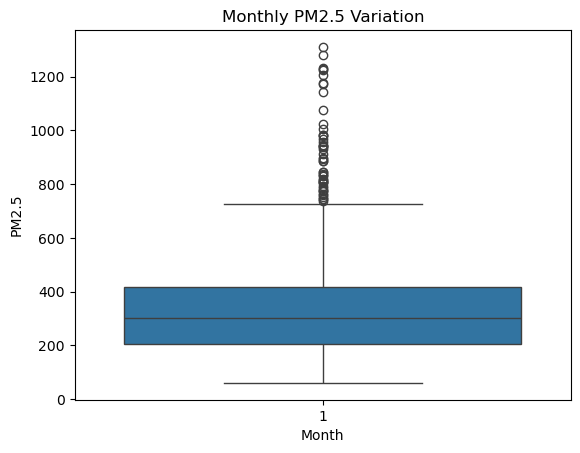

In [31]:
delhiaqi['Month'] = delhiaqi['date'].dt.month
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Month', y='pm2_5', data=delhiaqi)
plt.title("Monthly PM2.5 Variation")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.show()

                               4.PM2.5 vs AQI

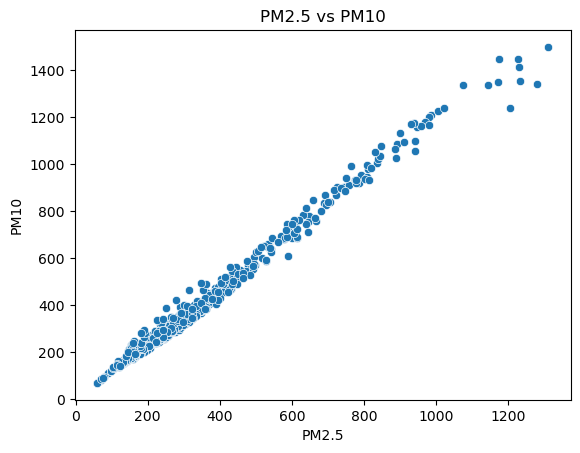

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='pm2_5', y='pm10', data=delhiaqi)
plt.title("PM2.5 vs PM10")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

                           5.Correlation Heatmap

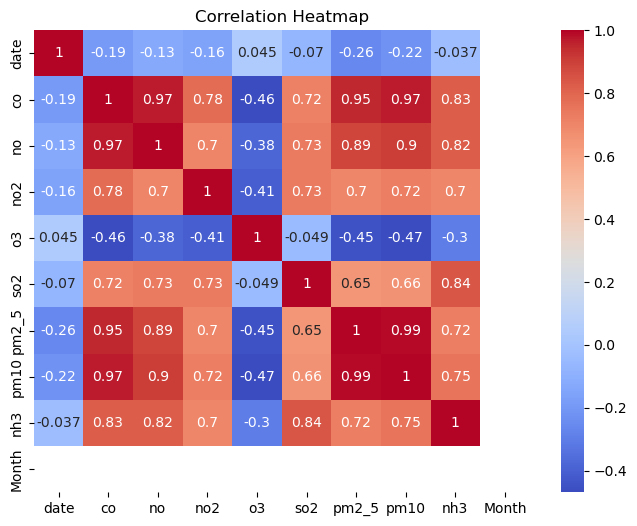

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(delhiaqi.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()